In [1]:
import random

import numpy as np
import torch
import math
import torch.nn as nn
from PIL import Image
from torch.autograd import Variable
from torchvision.transforms import transforms

from commons import inc_convolution, inc_max_pool
from imagenet_classes import class_names
from vgg16 import VGG16

import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
batch_size = 1
patch_size = 16
input_size = 224

p = (input_size - patch_size)//2
patch_locations = [(p, p)]*batch_size

loader = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])
images = Image.open('./dog_resized.jpg')
images = loader(images)

images = images.unsqueeze(0)
images_batch = images.repeat(batch_size, 1, 1, 1)

image_patch = torch.cuda.FloatTensor(3, patch_size, patch_size).fill_(0)

for i,(x,y) in enumerate(patch_locations):
    images_batch[i, :, x:x+patch_size, y:y+patch_size] = image_patch

y = VGG16().forward(images_batch.cuda())

image_patches = image_patch.unsqueeze(0).repeat(batch_size, 1, 1, 1)
patch_locations = torch.from_numpy(np.array(patch_locations, dtype=np.int32))

inc_model = VGG16(beta=0.2)

inc_model.eval()
inc_model.forward_materialized(images)
x = inc_model.forward_gpu(image_patches, patch_locations, patch_size, patch_size)

(tensor([[ 103,  103]], dtype=torch.int32, device='cuda:0'), 18, torch.Size([1, 64, 18, 18]))
(tensor([[ 102,  102]], dtype=torch.int32, device='cuda:0'), 20, torch.Size([1, 64, 20, 20]))
(tensor([[ 51,  51]], dtype=torch.int32, device='cuda:0'), 11, torch.Size([1, 64, 11, 11]))
(tensor([[ 50,  50]], dtype=torch.int32, device='cuda:0'), 13, torch.Size([1, 128, 13, 13]))
(tensor([[ 49,  49]], dtype=torch.int32, device='cuda:0'), 15, torch.Size([1, 128, 15, 15]))
(tensor([[ 24,  24]], dtype=torch.int32, device='cuda:0'), 8, torch.Size([1, 128, 8, 8]))
(tensor([[ 23,  23]], dtype=torch.int32, device='cuda:0'), 10, torch.Size([1, 256, 10, 10]))
(tensor([[ 22,  22]], dtype=torch.int32, device='cuda:0'), 12, torch.Size([1, 256, 12, 12]))
(tensor([[ 22,  22]], dtype=torch.int32, device='cuda:0'), 12, torch.Size([1, 256, 12, 12]))
(tensor([[ 11,  11]], dtype=torch.int32, device='cuda:0'), 6, torch.Size([1, 256, 6, 6]))
(tensor([[ 10,  10]], dtype=torch.int32, device='cuda:0'), 8, torch.Size([1

In [4]:
s = 4
p = 5
#temp = x - y[:,:,p:p+s,p:p+s]

temp = y-x

temp = temp.cpu().data.numpy()
print(np.max(np.abs(temp)))

7.3735347


In [5]:
print(x.shape)
114 > round(224*0.5) and 114 >= 3
remove_y = max(2, ((114 - round(224 * 0.5))//2)*2)
remove_y
min(int(math.ceil((114-remove_y+2-1)*1.0/2)), 112)

torch.Size([1, 512, 7, 7])


57

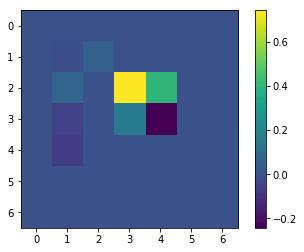

In [22]:
plt.imshow(temp[0,15])
plt.colorbar()

In [7]:
temp[0,0,:,:]

array([[ 0.0000000e+00,  0.0000000e+00,  2.0147681e-02,  1.8095613e-02,
         4.7165811e-02,  5.6624413e-06,  1.1920929e-07],
       [ 0.0000000e+00, -3.0672073e-02,  3.0280828e-02, -3.9072037e-03,
         7.3199034e-02,  7.7190638e-02,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.1409158e-01,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  1.4442629e-01, -1.0073185e-05],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  7.7398121e-03, -6.7353249e-06],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [6]:
temp = zip([1, 1],[2, 2])
import numpy as np
temp

[(1, 2), (1, 2)]

In [1]:
np.array(temp).tolist()

NameError: name 'np' is not defined

In [1]:
import numpy as np
import torch.nn as nn
from PIL import Image
import random as rand
import os
import math
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.transforms import transforms
from resnet18 import ResNet18
from vgg16 import VGG16
from inception3 import Inception3

import matplotlib.pyplot as plt

%matplotlib inline

from commons import inc_convolution, inc_max_pool, inc_add, batch_normalization, full_projection
from commons import load_dict_from_hdf5
from imagenet_classes import class_names

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
batch_size = 1
patch_size = 16
input_size = 299

patch_locations = torch.cuda.IntTensor(1, 2)
patch_locations[0, 0] = (input_size-patch_size)//2
patch_locations[0, 1] = (input_size-patch_size)//2

loader = transforms.Compose([transforms.Resize([input_size, input_size]), transforms.ToTensor()])
image = Image.open('./dog_resized.jpg')
image = loader(image)
image = image.unsqueeze(0).cuda()

image_patch = torch.zeros([1, 3, patch_size, patch_size], dtype=torch.float32)
#image[:, :, (input_size-patch_size)//2:(input_size-patch_size)//2+patch_size, (input_size-patch_size)//2:(input_size-patch_size)//2+patch_size].clone()

model1 = Inception3().eval().cuda()
model2 = Inception3().eval().cuda()

beta = 0.8

model1.forward_materialized(image)
x = model1.forward_gpu(image_patch, patch_locations, patch_size, patch_size, beta=beta)


mod_image = image.clone()
mod_image[:, :, (input_size-patch_size)//2:(input_size-patch_size)//2+patch_size,
          (input_size-patch_size)//2:(input_size-patch_size)//2+patch_size] = image_patch
y = model2(mod_image)


temp = x - y
print(np.max(np.abs(temp.cpu().data.numpy())))

#x[:, :, (224-patch_size)//2:(224-patch_size)//2+patch_size, (224-patch_size)//2:(224-patch_size)//2+patch_size] = image_patch
#print(class_names[np.argmax(y.data.cpu().numpy()[0, :])])

(tensor([[ 70,  70]], dtype=torch.int32, device='cuda:0'), 9, torch.Size([1, 32, 9, 9]))
(tensor([[ 68,  68]], dtype=torch.int32, device='cuda:0'), 11, torch.Size([1, 32, 11, 11]))
(tensor([[ 67,  67]], dtype=torch.int32, device='cuda:0'), 13, torch.Size([1, 64, 13, 13]))
(tensor([[ 33,  33]], dtype=torch.int32, device='cuda:0'), 8, torch.Size([1, 64, 8, 8]))
(tensor([[ 33,  33]], dtype=torch.int32, device='cuda:0'), 8, torch.Size([1, 80, 8, 8]))
(tensor([[ 31,  31]], dtype=torch.int32, device='cuda:0'), 10, torch.Size([1, 192, 10, 10]))
(tensor([[ 15,  15]], dtype=torch.int32, device='cuda:0'), 6, torch.Size([1, 192, 6, 6]))
(tensor([[ 13,  13]], dtype=torch.int32, device='cuda:0'), 10, torch.Size([1, 256, 10, 10]))
(tensor([[ 11,  11]], dtype=torch.int32, device='cuda:0'), 14, torch.Size([1, 288, 14, 14]))
(tensor([[ 9,  9]], dtype=torch.int32, device='cuda:0'), 18, torch.Size([1, 288, 18, 18]))
(tensor([[ 3,  3]], dtype=torch.int32, device='cuda:0'), 11, torch.Size([1, 768, 11, 11])

In [3]:
model1 = Inception3().eval().cuda()
model1.forward_materialized(image)
patch_locations = torch.cuda.IntTensor(1, 2)
patch_locations[0, 0] = (input_size-patch_size)//2
patch_locations[0, 1] = (input_size-patch_size)//2
x = model1.forward_gpu(image_patch, patch_locations, patch_size, patch_size, beta=0.7)

temp = x - y
print(np.max(np.abs(temp.cpu().data.numpy())))

0.013320982


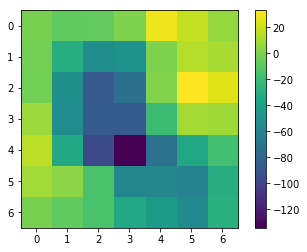

In [6]:
plt.imshow(np.sum(temp[0,:,:,:].cpu().data.numpy(), axis=0))
plt.colorbar()

In [1]:
plt.imshow(temp[0,0,:,:].cpu().data.numpy()[39:39+35,39:39+35])

NameError: name 'plt' is not defined

In [6]:
temp[0,0,:,:].cpu().data.numpy()[39:39+35,39:39+35]

array([[-7.7071011e-02, -4.8238552e-01, -6.1929846e-01, ...,
         2.1777752e-01,  1.5805438e-02,  9.3623474e-03],
       [-3.4303617e-01, -2.3509622e-02,  5.5429339e-01, ...,
        -1.2133603e+00, -2.6132292e-01, -2.0076916e-02],
       [ 7.8838754e-01,  2.0174165e+00,  2.0246296e+00, ...,
         1.1568482e+00,  3.9879766e-01, -1.5221536e-04],
       ...,
       [-5.2040040e-01, -6.3380140e-01,  2.7748156e-01, ...,
        -3.5855979e-01,  4.1836008e-02,  8.2335323e-03],
       [ 2.3656686e-01,  1.5254842e+00,  1.6970832e+00, ...,
         9.7937816e-01,  2.5400716e-01, -3.5314858e-03],
       [ 1.7921031e-03,  2.1401720e-01,  1.8472385e-01, ...,
         9.8898225e-02, -2.2731960e-02, -7.9751909e-03]], dtype=float32)